In [32]:
# machine learning classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation

import pandas as pd
import numpy as np
# To plot

import matplotlib.pyplot as plt
import seaborn



In [33]:
import yfinance as yf

df = yf.download("USDBRL=X", start="2016-01-01")
#df = df.dropna()
#df.Close.plot(figsize=(10,5))
#plt.ylabel("USD/BRL")
#plt.show()


[*********************100%***********************]  1 of 1 completed


In [34]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,3.950000,3.9500,3.950000,3.950000,3.950000,0
2016-01-04,3.960500,4.0594,3.955700,3.949100,3.949100,0
2016-01-05,4.037100,4.0531,3.995700,4.037300,4.037300,0
2016-01-06,4.027100,4.0505,4.006000,4.026900,4.026900,0
2016-01-07,4.020900,4.0687,4.018400,4.019900,4.019900,0
...,...,...,...,...,...,...
2022-01-06,5.707700,5.7218,5.682800,5.705635,5.705635,0
2022-01-07,5.680289,5.7069,5.619900,5.682400,5.682400,0
2022-01-10,5.632000,5.6895,5.624600,5.632200,5.632200,0


In [35]:
# Create Features
df["Open-Close"] = df.Open - df.Close
df["High-Low"] = df.High - df.Low
df["Retorno"] = np.log(df["Close"]/df["Close"].shift(1))
# Drop Nan values
df.dropna(inplace=True)
X=df[["Open-Close","High-Low","Retorno"]]#.dropna()

#X = df.dropna(inplace=True)

# Target Variable
Y = np.where(df["Close"].shift(-1) > df["Close"],1,-1)

#df["Signal"] = df["Close"].shift(-1)

In [36]:
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Retorno
Date,,,,,,,,,
2016-01-04,3.960500,4.0594,3.955700,3.949100,3.949100,0,0.011400,0.103700,-0.000228
2016-01-05,4.037100,4.0531,3.995700,4.037300,4.037300,0,-0.000200,0.057400,0.022088
2016-01-06,4.027100,4.0505,4.006000,4.026900,4.026900,0,0.000200,0.044500,-0.002579
2016-01-07,4.020900,4.0687,4.018400,4.019900,4.019900,0,0.001000,0.050300,-0.001740
2016-01-08,4.041700,4.0434,4.002200,4.041500,4.041500,0,0.000200,0.041200,0.005359
...,...,...,...,...,...,...,...,...,...
2022-01-06,5.707700,5.7218,5.682800,5.705635,5.705635,0,0.002065,0.039000,0.005172
2022-01-07,5.680289,5.7069,5.619900,5.682400,5.682400,0,-0.002111,0.087000,-0.004081
2022-01-10,5.632000,5.6895,5.624600,5.632200,5.632200,0,-0.000200,0.064900,-0.008874


In [37]:
data_length = df.shape[0]

# Split the data
split = int(data_length*0.75)

In [38]:
# Train data set

X_train = X[:split]
Y_train = Y[:split]

In [39]:
# Test data set

X_test = X[split:]
Y_test = Y[split:]

In [40]:
# Fit the model
cls = SVC().fit(X_train,Y_train)

In [41]:
# Accuracy Results
accuracy_train = accuracy_score(Y_train,cls.predict(X_train))
accuracy_test = accuracy_score(Y_test, cls.predict(X_test))


In [42]:
accuracy_test

0.5419847328244275

In [43]:
accuracy_train

0.5870858113848768

In [44]:
df["Predicted_Signal"] = cls.predict(X)

In [45]:
df["Predicted_Signal"]


Date
2016-01-04    1
2016-01-05   -1
2016-01-06    1
2016-01-07    1
2016-01-08   -1
             ..
2022-01-06   -1
2022-01-07    1
2022-01-10    1
2022-01-11    1
2022-01-12    1
Name: Predicted_Signal, Length: 1570, dtype: int32

In [52]:
# The return accumulate of USDBRL

df["Return_USDBRL"] = np.log(df.Close.shift(-1)/df.Close)*100

df["Return"] = np.log(df.Close.shift(-1)/df.Close)*100
df["Strategy_Return"] = df.Return * df.Predicted_Signal

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1569 entries, 2016-01-04 to 2022-01-11
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              1569 non-null   float64
 1   High              1569 non-null   float64
 2   Low               1569 non-null   float64
 3   Close             1569 non-null   float64
 4   Adj Close         1569 non-null   float64
 5   Volume            1569 non-null   int64  
 6   Open-Close        1569 non-null   float64
 7   High-Low          1569 non-null   float64
 8   Retorno           1569 non-null   float64
 9   Predicted_Signal  1569 non-null   int32  
 10  Return_USD_BRL    1569 non-null   float64
 11  Return            1568 non-null   float64
 12  Strategy_Return   1568 non-null   float64
 13  Return_USDBRL     1568 non-null   float64
dtypes: float64(12), int32(1), int64(1)
memory usage: 177.7 KB


In [54]:
df.dropna(inplace=True)

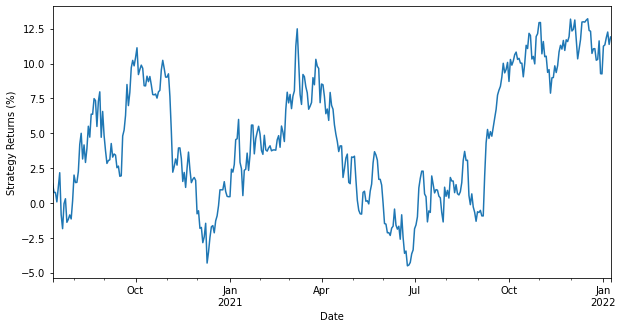

In [55]:
# Strategy Return
df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()

<AxesSubplot:xlabel='Date'>

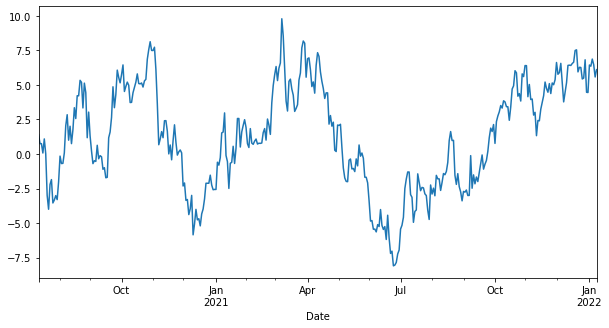

In [56]:
# USD/BRL Return

df.Return_USDBRL.iloc[split:].cumsum().plot(figsize=(10,5))

In [57]:
df.Return_USDBRL.iloc[split:].cumsum()

Date
2020-07-13    1.390728
2020-07-14    0.746234
2020-07-15    0.748997
2020-07-16    0.071309
2020-07-17    1.090359
                ...   
2022-01-04    6.351252
2022-01-05    6.868484
2022-01-06    6.460426
2022-01-07    5.573063
2022-01-10    6.104305
Name: Return_USDBRL, Length: 391, dtype: float64

In [58]:
df.Strategy_Return.iloc[split:].cumsum()

Date
2020-07-13     1.390728
2020-07-14     0.746234
2020-07-15     0.748997
2020-07-16     0.071309
2020-07-17     1.090359
                ...    
2022-01-04    11.333548
2022-01-05    11.850779
2022-01-06    12.258837
2022-01-07    11.371474
2022-01-10    11.902716
Name: Strategy_Return, Length: 391, dtype: float64